## **Laboratorio #3**

Stefanie M. Alvarez Pérez, 20002045

In [644]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [645]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1. Cargamos Dataset

In [646]:
data = pd.read_csv('/content/drive/MyDrive/Product Development/Laboratorio #2/train.csv')

print(str(data.shape) + '\n')

data.head()

(891, 12)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Eliminamos columna de PassengerID, Name y Ticket (no son relevantes)

In [647]:
data.drop('PassengerId', axis=1, inplace=True)
data.drop('Ticket', axis=1, inplace=True)
data.drop('Name', axis=1, inplace=True)

print(str(data.shape)) #Para revisar que sí borraron las columnas PassengerID, Name y Ticket

(891, 9)


In [648]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


### 2. Análisis de Datos para toma de decisiones

##### 2.1 Análisis de las variables


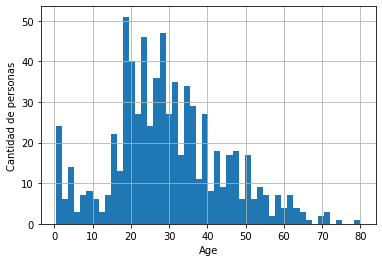

In [649]:
data['Age'].hist(bins=50, density=False) #Hacer un histograma
plt.xlabel("Age")
plt.ylabel("Cantidad de personas")
plt.show()

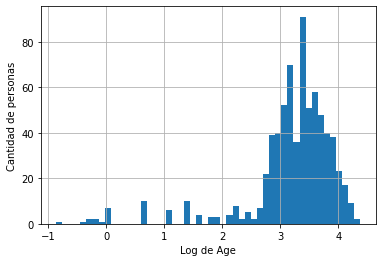

In [650]:
#transformación de target con log.
np.log(data['Age']).hist(bins=50, density=False) #Aplicar una transformación logarítmica (otras... exponencial, young, boxcut)
plt.xlabel("Log de Age")
plt.ylabel("Cantidad de personas")
plt.show()

#### 2.2 Verificamos tipos de variables en X

In [651]:
data.dtypes #(object (0) = string/categóricas)

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [652]:
cat_vars = [var for var in data.columns if data[var].dtype == 'O'] #O = tipo object

#Agregamos el caso especial de PClass ya que por definición, esta variable es categórica. Hay veces que la columna puede contener un número pero ser una variable categórica
cat_vars = cat_vars + ['Pclass'] #Lista + lista.

In [653]:
#cantidad de varaibles categóricas
len(cat_vars)

4

In [654]:
#Forzamos a todas las variables como categóticas
data[cat_vars] = data[cat_vars].astype('O')

In [655]:
#variables numéricas (son las que no son categoricas y tampoco la variable que queremos predecir)
num_vars = [var for var in data.columns if(var not in cat_vars and var != 'survived')] #El != es para que no tome el target.

In [656]:
len(num_vars) #Con esto comprobamos que hay exactamente 5 variables numéricas y 5 categóricas

5

#### 2.3 Análisis de Valores Faltantes

In [657]:
#% de pérdidas e impacto de variables faltantes... 3 variables con na's en algún punto
var_with_na = [var for var in data.columns if(data[var].isnull().sum() > 0)]
len(var_with_na)

3

In [658]:
#proporcion de NAs en cada variable (is null mapea los nulos, ascending = los ordena de mayor a menor)
data[var_with_na].isnull().mean().sort_values(ascending=False)

Cabin       0.771044
Age         0.198653
Embarked    0.002245
dtype: float64

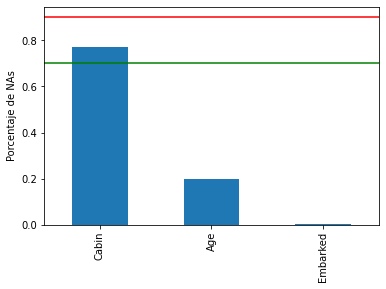

In [659]:
#graficamos porcentajes de NAs.
data[var_with_na].isnull().mean().sort_values(ascending=False).plot.bar()
plt.ylabel("Porcentaje de NAs")
plt.axhline(y=0.9, color="r")
plt.axhline(y=0.7, color="g") #Lo que está abajo del 0.7 es rescatable, lo que está arriba ya no

Verificar si son variables numéricas o categóricas

In [660]:
#variables categóricas con NAs. (Con las variables categóricas se hace una imputación de la categoría faltante o algo más... depende de la proporción)
cat_na = [var for var in cat_vars if var in var_with_na]
cat_na

['Cabin', 'Embarked']

In [661]:
#variables numéricas con NAs. (Con estas variables es que se hace imputación con media, moda, mediana, etc.)
num_na = [var for var in num_vars if var in var_with_na]
num_na

['Age']

In [662]:
print("Cantidad de variables numéricas con NAs. {}".format(len(num_na)))
print("Cantidad de variables categóticas con NAs. {}".format(len(cat_na)))

#Esto suma el 3 obtenido anteriormente

Cantidad de variables numéricas con NAs. 1
Cantidad de variables categóticas con NAs. 2


#### 2.3.1 Verificación del impacto del NA

In [663]:
def na_impact_over_target(df, Xvar, Yvar):
    df = data.copy() #Le vamos a caer encima con nuevos valores
    df[Xvar] = np.where(df[Xvar].isnull(), 1, 0) #Si es nulo = 1, si no es nulo = 0
    temp = df.groupby(Xvar)[Yvar].agg(['mean', 'std']) #Cuál es la media de cuando hay un valor faltante?
    
    temp.plot(kind="barh", y="mean", xerr="std", legend=False, title=Yvar)
    plt.show()

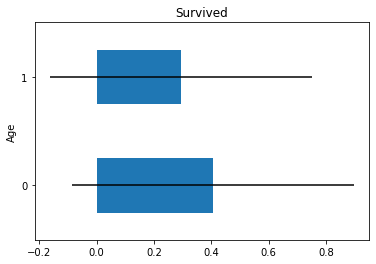

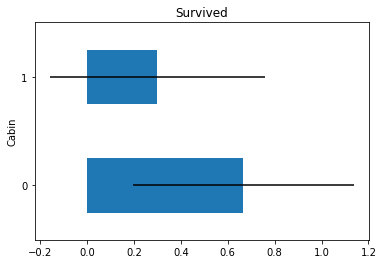

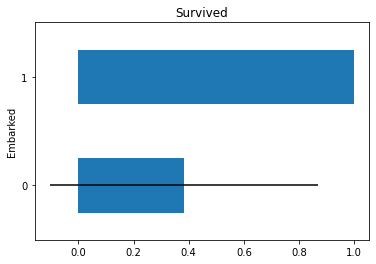

In [664]:
for var in var_with_na:
    na_impact_over_target(data, var, 'Survived') #Para graficar todas las variables.

In [665]:
#Quitar la variable "cabin" porque tiene demasiados NA's
data.drop('Cabin', axis=1, inplace=True)
print(str(data.shape))
data.head()

(891, 8)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [666]:
data.dtypes

Survived      int64
Pclass       object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [667]:
cat_vars = [var for var in data.columns if data[var].dtype == 'O'] #O = tipo object

In [668]:
len(cat_vars)

3

#### 2.4 Análisis de Variables Temporales (Variable Age)

In [669]:
year_vars = [var for var in num_vars if ('Age' in var)]
year_vars

['Age']

In [670]:
#Valores distintos por variable temporal
for var in year_vars:
    print(var, data[var].unique())
    print('\n')

Age [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]




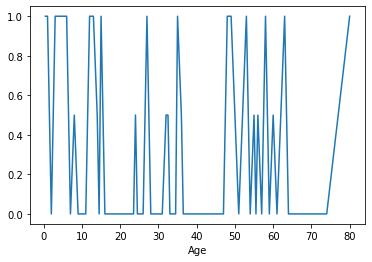

In [671]:
#Cómo la edad impacta sobre la variable a predecir? (X)[Y]
data.groupby('Age')['Survived'].median().plot()

In [672]:
def plot_target_vrs_timeVar(df, Xvar, Yvar): #Lo anterior convirtiéndolo en función
    df = df.copy() #Hacer una copia del dataset original
    df.groupby(Xvar)[Yvar].median().plot()
    plt.show()

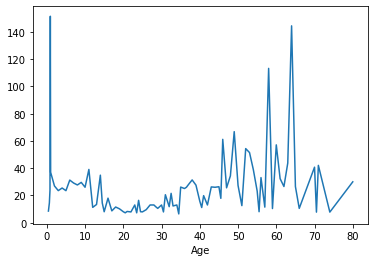

In [673]:
for var in year_vars:
    plot_target_vrs_timeVar(data, var, 'Fare')

## 2.5 Variables Discretas


In [674]:
#Si la cantidad de elementos que tiene una variable es menor a 20, es discreta. Si es mayor, es continua
discrete_vars = [var for var in num_vars if((len(data[var].unique()) < 20) and (var not in year_vars))]
discrete_vars

['Survived', 'SibSp', 'Parch']

In [675]:
print("Cantidad de Variables Discretas: ", len(discrete_vars))

Cantidad de Variables Discretas:  3


In [676]:
#Podemos ver que son valores que tienen una naturaleza discreta
data[discrete_vars].head()

,Survived,SibSp,Parch
0,0,1,0
1,1,1,0
2,1,0,0
3,1,1,0
4,0,0,0


In [677]:
import seaborn as sns

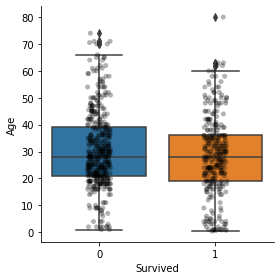

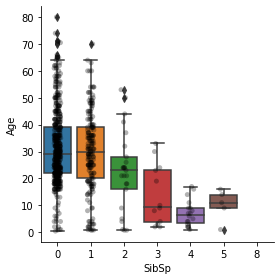

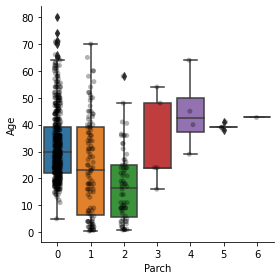

In [678]:
for var in discrete_vars:
    sns.catplot(x=var, y = 'Age', data=data, kind="box", height=4)
    sns.stripplot(x=var, y='Age', data=data, jitter=0.1, alpha=0.3,color='k')
    plt.show()

## 2.6 Variables Continuas

In [679]:
cont_vars = [var for var in num_vars if var not in discrete_vars + year_vars] #todas las variables no incluidas anteriormente

In [680]:
print("Variables Numericas Continuas: ", len(cont_vars))

Variables Numericas Continuas:  1


In [681]:
data[cont_vars].head() #Tiene estructura de variables continuas (con decimales, más cantidad, etc.)

,Fare
0,7.2500
1,71.2833
2,7.9250
3,53.1000
4,8.0500


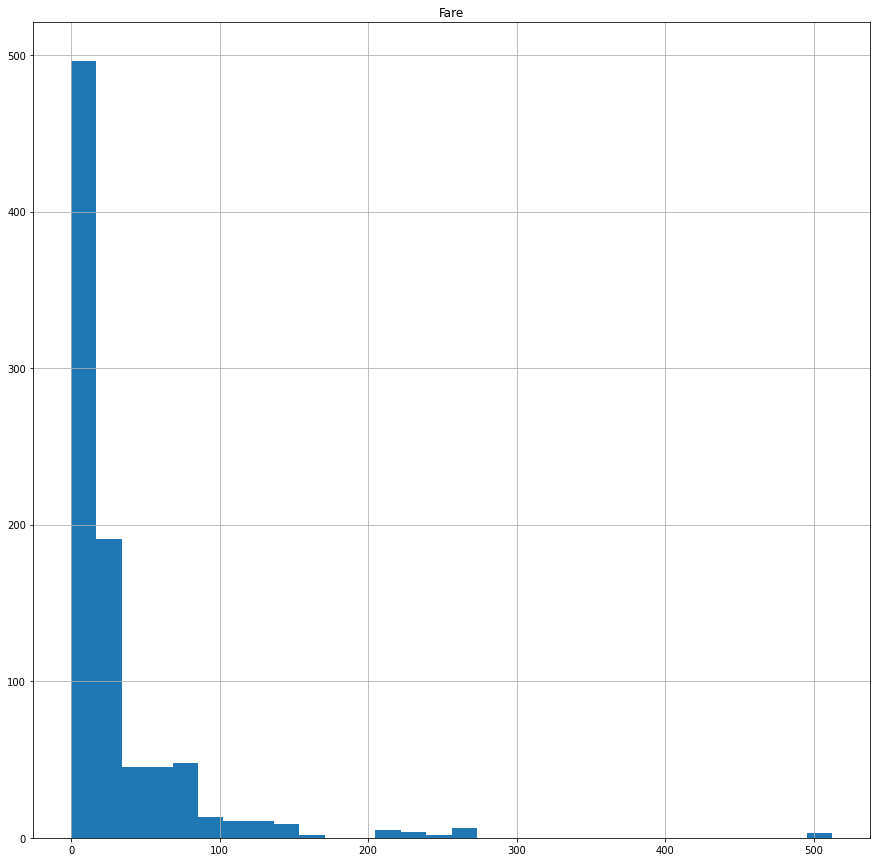

In [682]:
#Tipos de distribución que tiene, para saber qué cambios hacerle... Tener una distribución lo más normal posible
data[cont_vars].hist(bins=30, figsize=(15, 15))
plt.show()

In [683]:
#Estas son las variables que están super sesgadas
#sesgadas = ['Fare']

In [684]:
#Se quitan las que están demasiado sesgadas
#cont_vars = [var for var in cont_vars if var not in sesgadas]

In [685]:
#cont_vars

#### Transformación de Yeo-Johnson

In [686]:
#Paquete para poder usar la transformación de Yeo-Johnson
import scipy.stats as stats

In [687]:
#Copia del dataset original
temp_yj = data.copy()

In [688]:
#Función de Yeo-Johnson
for var in cont_vars:
    temp_yj[var], param = stats.yeojohnson(data[var])

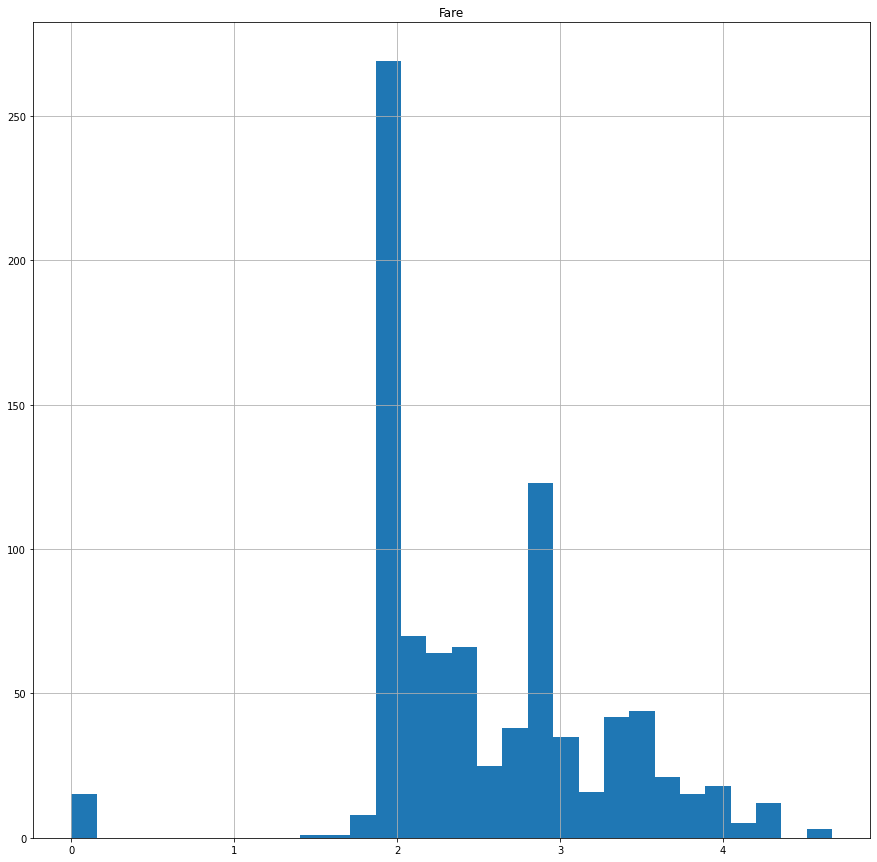

In [689]:
temp_yj[cont_vars].hist(bins=30, figsize=(15, 15))
plt.show()

In [690]:
len(cont_vars)

1

In [691]:
cont_specials = ['Fare']

In [692]:
#Aplicar transformación logarítmica para ver si mejora la distribución
# Volver a duplicar el dataset
temp = data.copy()

for var in cont_vars:
    temp[var] = np.log(data[var] + 1)

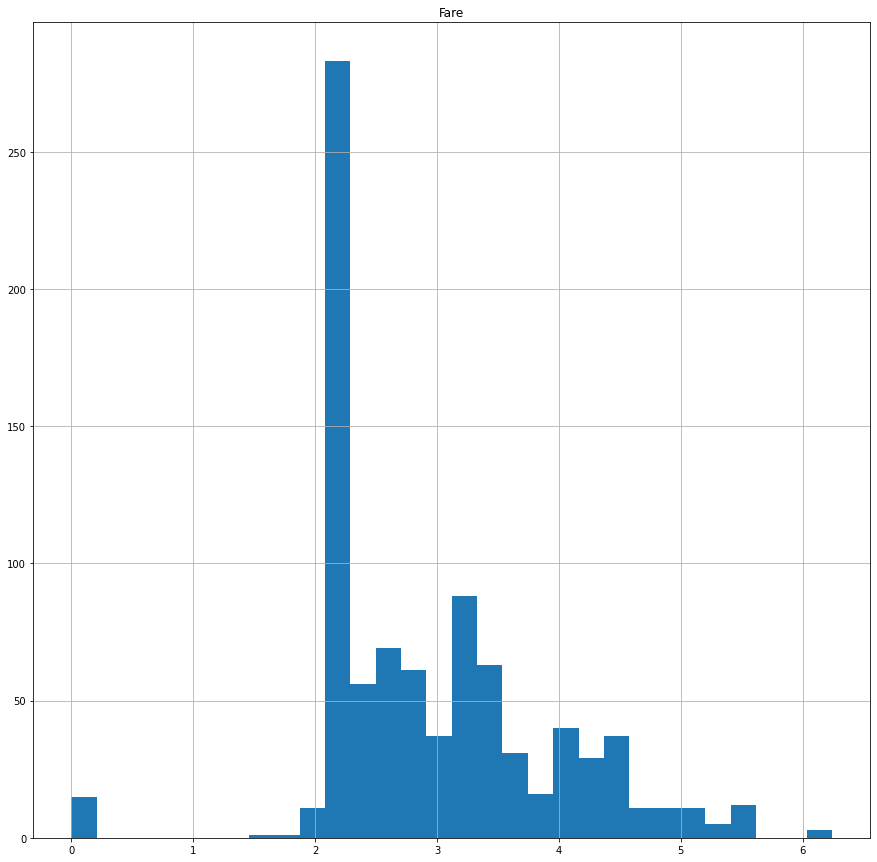

In [693]:
temp[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

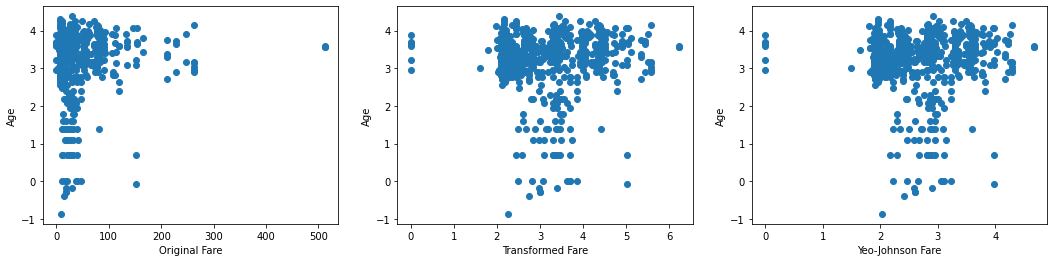

In [694]:
#Cómo impacta la transformación
for var in cont_vars:
    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 3, 1)
    plt.scatter(data[var], np.log(data['Age']))
    plt.ylabel("Age")
    plt.xlabel("Original " + var)
    
    plt.subplot(1, 3, 2)
    plt.scatter(temp[var], np.log(data['Age']))
    plt.ylabel("Age")
    plt.xlabel("Transformed " + var)
    
    plt.subplot(1, 3, 3)
    plt.scatter(temp_yj[var], np.log(data['Age']))
    plt.ylabel("Age")
    plt.xlabel("Yeo-Johnson " + var)

    plt.show()

### 2.6.1 Variables con Sesgo

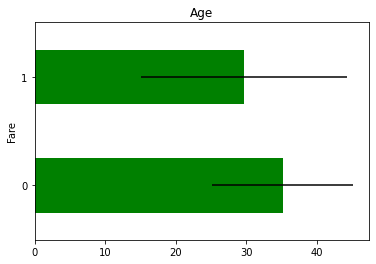

In [695]:
for var in sesgadas:
    temp = data.copy()
    # Colocar las variables en función de 0's y 1's
    temp[var] = np.where(data[var] == 0, 0, 1) # Si el valor es igual a 0, le ponemos 0 y sino le ponemos 1
    
    #Sacar la media y desviación
    temp = temp.groupby(var)['Age'].agg(['mean', 'std'])
    
    #Graficar
    temp.plot(kind='barh', y="mean", legend=False, xerr="std", title = "Age", color="green")
    plt.show()

## 2.7 Variables Categóricas

In [696]:
len(cat_vars) #Cantidad de variables categóricas

3

In [697]:
data[cat_vars].head()

,Pclass,Sex,Embarked
0,3,male,S
1,1,female,C
2,3,female,S
3,1,female,S
4,3,male,S


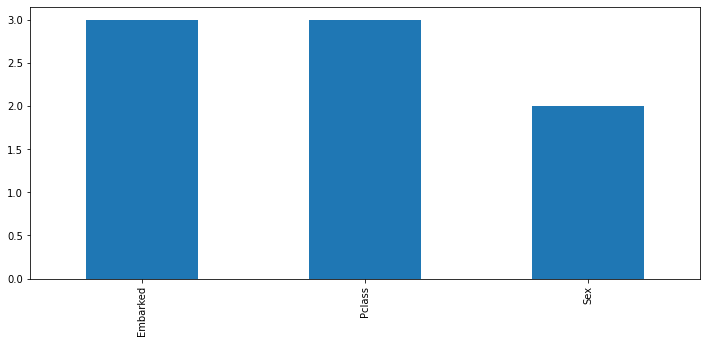

In [698]:
#Sacar la cantidad de valores distintos en cada variable
data[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

In [699]:
#Nombres de los valores únicos por cada variable.
#np.unique(data['Embarked'])

In [700]:
np.unique(data['Pclass'])

array([1, 2, 3], dtype=object)

In [701]:
np.unique(data['Sex'])

array(['female', 'male'], dtype=object)

In [702]:
#Hacer una codificación ordinal con los valores (un diccionario)
Diccio_Sex = {'female':1, 'male':2, '3':3, 'Missing':0, 'NA':0, 'NaN':0}

In [703]:
#Variables que tienen estos datos
Lista_Sex = ['Sex']

In [705]:
data['Sex'] = data['Sex'].map(Diccio_Sex)

In [706]:
#Hacer una codificación ordinal con los valores (un diccionario)
Diccio_Pclass = {'1':1, '2':2, '3':3, 'Missing':0, 'NA':0, 'NaN':0}

In [707]:
Lista_Pclass = ['Pclass']

In [708]:
data['Pclass'] = data['Pclass'].map(Diccio_Pclass)

In [709]:
#Hacer una codificación ordinal con los valores (un diccionario)
Diccio_E = {'C':1, 'Q':2, 'S':3, 'Missing':0, 'NA':0, 'NaN':0}

In [710]:
Lista_E = ['Embarked']

In [711]:
data['Embarked'] = data['Embarked'].map(Diccio_E)

In [712]:
data[Lista_E].head()

,Embarked
0,3.0
1,1.0
2,3.0
3,3.0
4,3.0


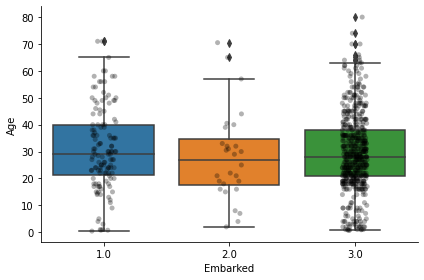

In [715]:
#La idea es ver cuales sí impactan y cuáles no impactan
for var in qual_vars:
    sns.catplot(x=var, y = 'Age', data=data, kind="box", height=4, aspect=1.5)
    sns.stripplot(x=var, y='Age', data=data, jitter=0.1, alpha=0.3,color='k')
    plt.show()